In [1]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from obspy.io.segy.segy import _read_segy

In [19]:
file = "Data/SA02X_migr.segy"

In [20]:
stream = _read_segy(file, headonly=True)

In [21]:
stream

3057 traces in the SEG Y structure.

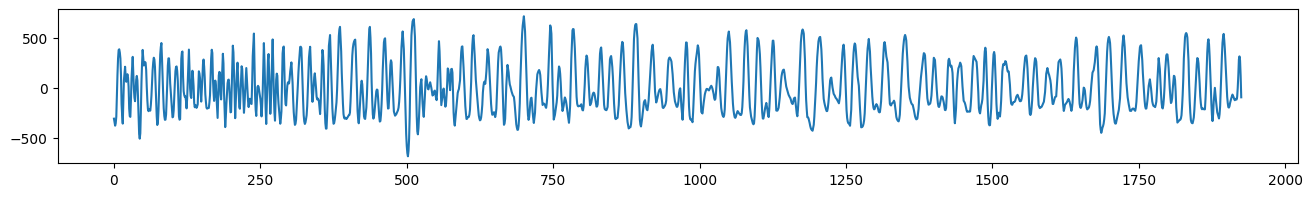

In [22]:
one_trace = stream.traces[0]

plt.figure(figsize=(16,2))
plt.plot(one_trace.data)
plt.show()

In [23]:
data = np.stack(t.data for t in stream.traces)

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [24]:
data.shape  # traces, time samples

(3057, 1926)

In [25]:
vm = np.percentile(data, 99)
print("The 99th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data.max()))

The 99th percentile is 603; the max amplitude is 866


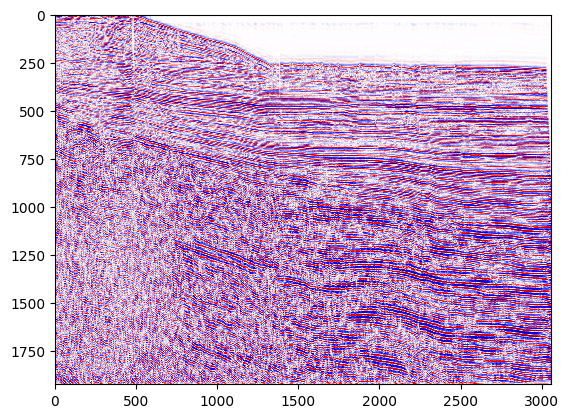

In [26]:
plt.imshow(data.T, cmap="seismic", vmin=-vm, vmax=vm, aspect='auto')

In [27]:
len(stream.traces)

3057

In [16]:
stream.traces[0]

Trace sequence number within line: 1
1926 samples, dtype=float32, 250.00 Hz

In [18]:
stream.traces[0].data.shape

(1926,)

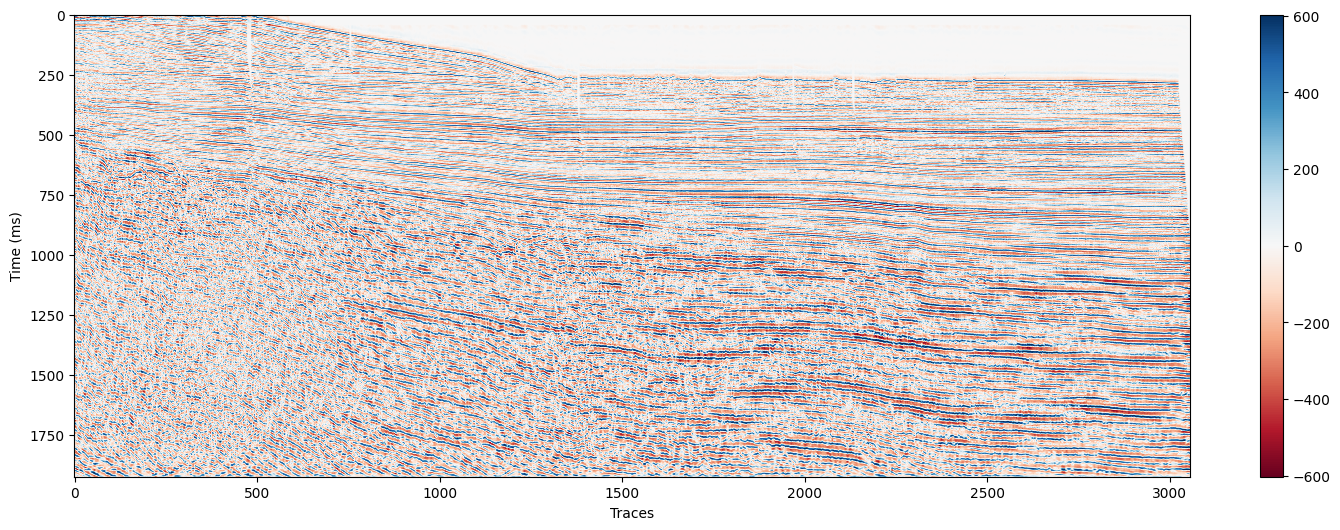

In [30]:
plt.figure(figsize=(18,6))
plt.imshow(data.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto')
plt.ylabel("Time (ms)")
plt.xlabel("Traces")
plt.colorbar()
plt.show()

In [31]:
x = np.array(list(stream.textual_file_header.decode()))
print('\n'.join(''.join(row) for row in x.reshape((40, 80))))

C 1 CLIENT MMS                                                                  
C 2 LINE SA02X     AREA Offshore U.S.A                                          
C 3                                                                             
C 4                                                                             
C 5                                                                             
C 6                                                                             
C 7                                                                             
C 8                                                                             
C 9                                                                             
C10                                                                             
C11                                                                             
C12                                                                             
C13                         

In [32]:
wget http://s3.amazonaws.com/open.source.geoscience/open_data/newzealand/Taranaiki_Basin/Keri_3D/Kerry3D.segy

SyntaxError: invalid syntax (1730768939.py, line 1)